<a href="https://colab.research.google.com/github/Gottdata/euribor-deposit-regression/blob/main/Interest_Rate_Modeling_Euribor_vs_Bank_Deposit_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Interest Rate Modeling: Euribor vs Bank Deposit Rates

## Introduction

## Data loading and processing


In [4]:
import pandas as pd
euribor = pd.read_csv('/content/ECB Data Portal_Euribor_3M.csv')
deposits = pd.read_csv('/content/ECB Data Portal_ overnight deposits from corporations .csv')

In [6]:
euribor['DATE'] = pd.to_datetime(euribor['DATE'])
deposits['DATE'] = pd.to_datetime(deposits['DATE'])

In [7]:
data = pd.merge(euribor, deposits, on='DATE', how='inner')

In [8]:
print(data.head)

<bound method NDFrame.head of           DATE TIME PERIOD_x  \
0   2000-01-31       2000Jan   
1   2000-02-29       2000Feb   
2   2000-03-31       2000Mar   
3   2000-04-30       2000Apr   
4   2000-05-31       2000May   
..         ...           ...   
296 2024-09-30       2024Sep   
297 2024-10-31       2024Oct   
298 2024-11-30       2024Nov   
299 2024-12-31       2024Dec   
300 2025-01-31       2025Jan   

     Euribor 3-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA)  \
0                                               3.3431                                                                 
1                                               3.5368                                                                 
2                                               3.7470                                                                 
3                                               3.9253                                                   

In [14]:
# Rename of columns
data.rename(columns={
    'Euribor 3-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA)': 'euribor',
    'Bank interest rates - overnight deposits from corporations - euro area (MIR.M.U2.B.L21.A.R.A.2240.EUR.N)': 'deposit_rate'
}, inplace=True)

# Drop columns
data.drop(columns=['TIME PERIOD_x', 'TIME PERIOD_y'], inplace=True)

In [15]:
print(data.head)
print(data.columns)

<bound method NDFrame.head of           DATE  euribor  deposit_rate
0   2000-01-31   3.3431          1.21
1   2000-02-29   3.5368          1.24
2   2000-03-31   3.7470          1.28
3   2000-04-30   3.9253          1.33
4   2000-05-31   4.3620          1.38
..         ...      ...           ...
296 2024-09-30   3.4337          0.88
297 2024-10-31   3.1666          0.82
298 2024-11-30   3.0068          0.81
299 2024-12-31   2.8161          0.77
300 2025-01-31   2.7031          0.76

[301 rows x 3 columns]>
Index(['DATE', 'euribor', 'deposit_rate'], dtype='object')


## Exploratory Data Analysis (EDA)

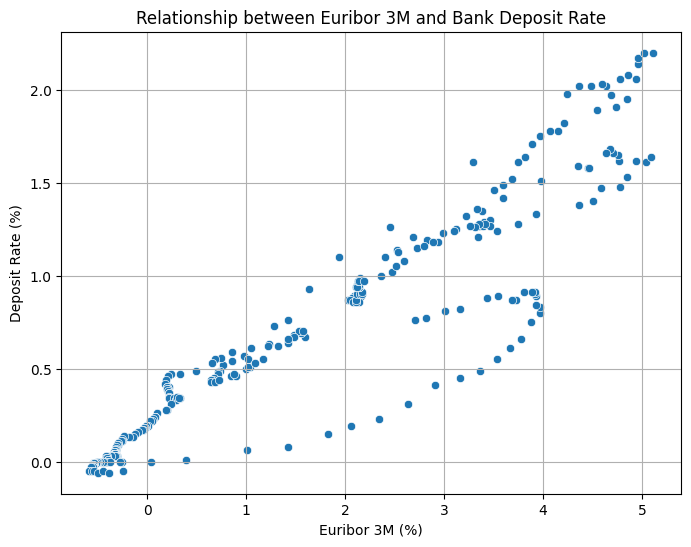

In [16]:
# Scatterplot between Euribor and Deposit Rate

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='euribor', y='deposit_rate', data=data)
plt.title('Relationship between Euribor 3M and Bank Deposit Rate')
plt.xlabel('Euribor 3M (%)')
plt.ylabel('Deposit Rate (%)')
plt.grid(True)
plt.show()

We observe a strong positive relationship between depostis and euribor rates, nevertheless we see a different behaivour for certain values for relatively low values  (below 1%) for Deposits Rates against Euribor 3M.

To gain insight into how the relationship changes over time, we color the data points by year in the scatter plot.

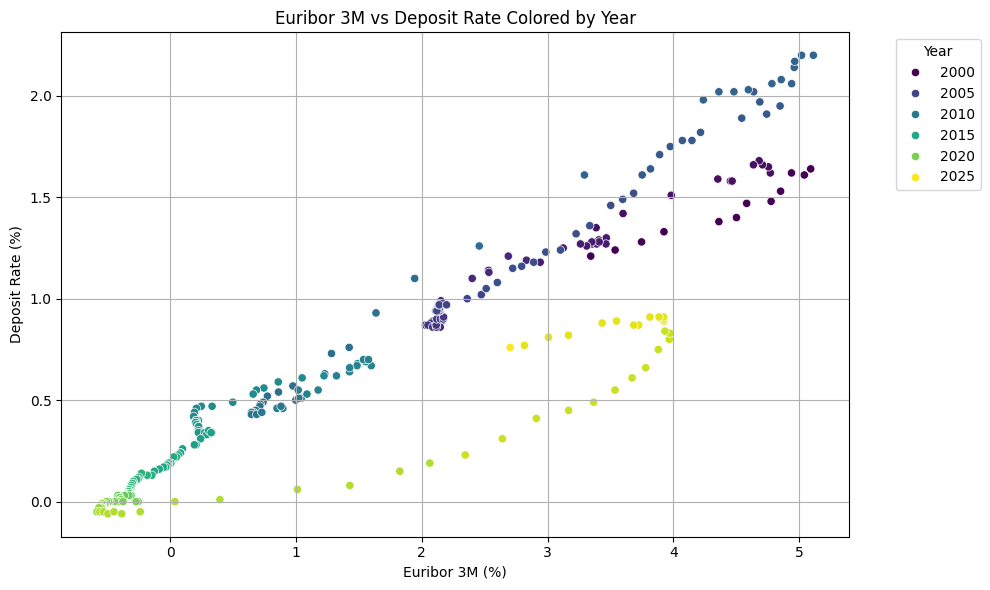

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 'year' column from the DATE
data['year'] = data['DATE'].dt.year

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='euribor',
    y='deposit_rate',
    hue='year',
    palette='viridis',
    data=data
)
plt.title('Euribor 3M vs Deposit Rate Colored by Year')
plt.xlabel('Euribor 3M (%)')
plt.ylabel('Deposit Rate (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**We observe that after the period of negative rates (with Euribor returning to positive territory in July 2022 after several years), the relationship between Euribor and deposit rates was not linear. Deposit rates did not follow the sharp increase in Euribor. Only in more recent months do the points begin to align along a diagonal, indicating a return to the more typical historical behavior.**

## Linear Regression

In [19]:
# Define X and Y

X = data[['euribor']]
y = data['deposit_rate']

In [20]:
# Model fit

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Values prediction and model valuation

y_pred = model.predict(X)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print(f'R²: {r2_score(y, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.4f}')

R²: 0.87
MAE: 0.1370
RMSE: 0.2183


**R² (R-squared):**
"The R² value of 0.87 indicates that approximately 87% of the variability in deposit rates can be explained by changes in the Euribor 3M rate. This suggests a strong linear relationship between the two variables."

**MAE (Mean Absolute Error):**
"The MAE of 0.14 means that, on average, the model's predictions deviate from the actual deposit rates by 0.14 percentage points."

**RMSE (Root Mean Squared Error):**
"The RMSE of 0.22 indicates that the typical prediction error is around 0.22 percentage points. Since RMSE penalizes larger errors more than MAE, it gives insight into whether there are any significant outliers or larger deviations. "

The RMSE is notably higher than the MAE, indicating the presence of some larger individual prediction errors.  
This is consistent with the scatter plot analysis, where we observed that after 2021—particularly following the rate shift in mid-2022—the relationship between Euribor and deposit rates became less linear.

During this period, deposit rates did not increase at the same pace as Euribor, likely due to institutional lag or pricing strategies. These deviations contribute to higher residuals and are reflected in the RMSE value.  

Such behavior could be considered temporary outliers when compared to the historical linear trend observed in earlier years.

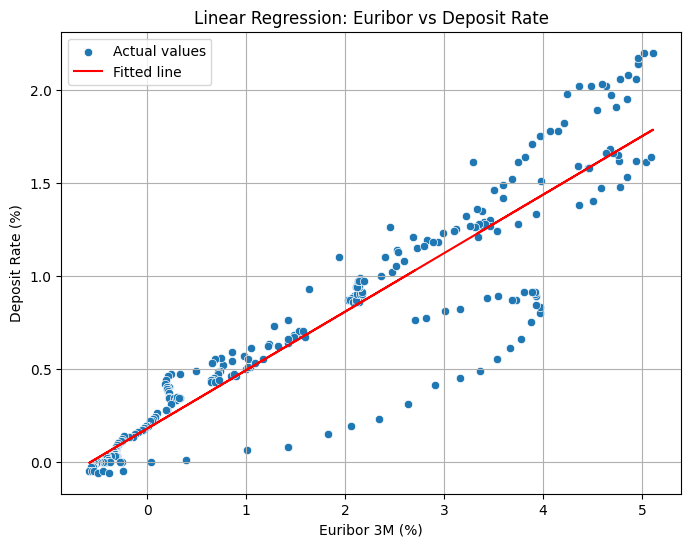

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='euribor', y='deposit_rate', data=data, label='Actual values')
plt.plot(data['euribor'], y_pred, color='red', label='Fitted line')
plt.title('Linear Regression: Euribor vs Deposit Rate')
plt.xlabel('Euribor 3M (%)')
plt.ylabel('Deposit Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

The linear regression model confirms a strong positive relationship between Euribor and deposit rates, although some deviation is observed in recent periods.  
The fitted line provides a reasonable approximation, suggesting that market rates remain a key driver in banks' deposit pricing strategies.

## Final Conclusion

This project explored the relationship between the 3-month Euribor rate and bank deposit rates using linear regression.

- The exploratory data analysis showed a historically strong linear relationship between the two rates.
- However, from mid-2022 onward—when Euribor returned to positive territory after years of negative rates—the relationship temporarily weakened. Banks did not adjust deposit rates as quickly, likely due to policy lags or strategic pricing behavior.
- The linear regression model yielded an R² of approximately 0.87
, indicating that the model explains most of the variability in deposit rates.
- The RMSE being larger than the MAE suggests some larger prediction errors, especially during periods where the relationship diverged from the historical trend.

Despite these deviations, the model effectively captures the overall trend and demonstrates how financial institutions may respond to shifts in market reference rates. This project highlights the value of combining exploratory analysis with predictive modeling to support interest rate monitoring and pricing strategy analysis in the banking sector.